In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import precision_score

In [3]:
df = pd.read_excel("Pruebita4 con variables Binario.xlsx")
df.sample(10)

,date,home_team,away_team,home_score,away_score,Competicion Valoracion,Condicion A,Condicion B,Resultado Home,Dif Goles Home,...,Dif Gol Acum Away,Performance Acum Home,Performance Acum Away,Perf Home Año,Perf Away Año,Dif Gol Año Home,Dif Gol Año Away,Mano a Mano Home,Mano a Mano Away,Target Binario
30343,2008-07-23,250,97,0,1,2,0,0,-1,-1,...,-203,-69,-71,-3,-2,0,-6,0,0,0
14690,1988-03-03,186,3,2,1,1,1,-1,1,1,...,145,117,48,-2,0,-1,3,0,0,1
23349,2001-01-06,90,293,2,1,1,1,-1,1,1,...,79,143,24,6,2,10,-3,1,-1,1
25274,2003-03-26,179,215,1,1,1,0,0,0,0,...,-90,209,-18,4,0,4,-3,-2,2,0
31312,2009-07-12,237,283,2,3,1,1,-1,-1,-1,...,267,-3,53,-2,6,-1,19,-4,4,0
12833,1984-03-03,285,140,1,2,1,1,-1,-1,-1,...,595,9,271,-2,-1,-7,2,-1,1,0
30835,2008-12-31,310,84,3,0,2,0,0,1,3,...,-273,128,-73,-1,-6,-4,-25,0,0,1
219,1913-03-03,301,247,0,0,4,1,-1,0,0,...,228,-65,87,-1,1,-2,3,0,0,0
39757,2018-06-12,219,162,4,0,1,1,-1,1,4,...,-287,93,-99,1,-5,5,-14,0,0,1
9472,1976-02-18,284,309,2,1,1,1,-1,1,1,...,203,73,64,3,3,5,6,-1,1,1


In [4]:
df.columns = ['fecha', 'equipo_a', 'equipo_b', 'goles_a',
        'goles_b', 'valor_competicion', 'condicion_a', 'condicion_b',
       'resultado_a', 'diferencia_gol_a', 'resultado_b', 'diferencia_gol_b',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'Target']

In [6]:
train_cols = ['equipo_a', 'equipo_b', 'valor_competicion', 'condicion_a', 'condicion_b','Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away','Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away']
X = df[train_cols]
y = df['Target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [9]:
cv = KFold(n_splits=3, random_state=10, shuffle=True)

In [10]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [11]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')


#evaluar_rendimiento(clf,  "Regresión Lógistica")
evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.575 ± 0.003
Rendimiento de Bagging AD:	0.643 ± 0.01
Rendimiento de Random Forest:	0.655 ± 0.009
Rendimiento de Extra Trees:	0.649 ± 0.009


In [12]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [13]:
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(recall_score(y_test,rf_pred))
print(precision_score(y_test,rf_pred))

0.6643795620437957
0.6360222322367433
0.6606334841628959


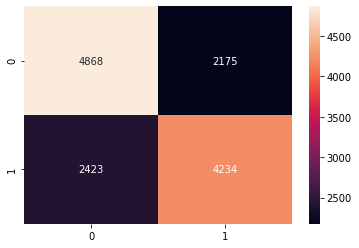

In [14]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rf_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

True


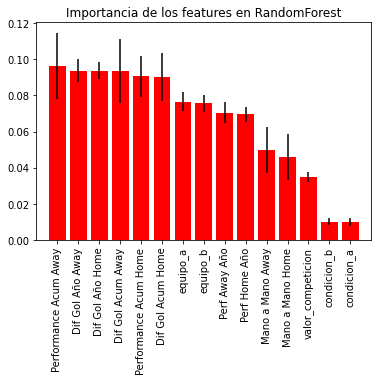

In [15]:
importancias = rf.feature_importances_
print (all(importancias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features en el random forest
plt.figure()
plt.title("Importancia de los features en RandomForest")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
#GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
evaluar_rendimiento(ab, "AdaBoostClassifier")
evaluar_rendimiento(gb, "GradientBoostingClassifier")

Rendimiento de AdaBoostClassifier:	0.659 ± 0.008
Rendimiento de GradientBoostingClassifier:	0.661 ± 0.01
